In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

In [9]:
with open('flops_ipc_cellxtime.json') as f:
    all_runs = json.load(f)
    
flags_gcc = list(all_runs.keys())[:10]
flags_clang = list(all_runs.keys())[10:]

In [121]:
react_avg = []
dens_avg = []
vel_avg = []
total_avg = []
react_time_avg = []
dens_time_avg = []
vel_time_avg = []
total_time_avg = []
react_IPC_avg = []
dens_IPC_avg = []
vel_IPC_avg = []
total_IPC_avg = []
cells_ms_avg = []

for size in ['64', '256']:
    for flag in flags_gcc:
        react_Runtime = np.zeros_like(all_runs[flag][size])
        dens_Runtime = np.zeros_like(all_runs[flag][size])
        vel_Runtime = np.zeros_like(all_runs[flag][size])
        total_Runtime = np.zeros_like(all_runs[flag][size])
        react_Mflops = np.zeros_like(all_runs[flag][size])
        dens_Mflops = np.zeros_like(all_runs[flag][size])
        vel_Mflops = np.zeros_like(all_runs[flag][size])
        total_Mflops = np.zeros_like(all_runs[flag][size])
        react_IPC = np.zeros_like(all_runs[flag][size])
        dens_IPC = np.zeros_like(all_runs[flag][size])
        vel_IPC = np.zeros_like(all_runs[flag][size])
        total_IPC = np.zeros_like(all_runs[flag][size])
        cells_ms = np.zeros_like(all_runs[flag][size])
        
        i = 0
        for run in all_runs[flag][size]:
            react_Runtime[i] = np.float32(run['REACT']['Runtime (RDTSC) [s]'])
            dens_Runtime[i] = np.float32(run['DENS']['Runtime (RDTSC) [s]'])
            vel_Runtime[i] = np.float32(run['VEL']['Runtime (RDTSC) [s]'])
            total_Runtime[i] = np.float32(run['TOTAL']['Runtime (RDTSC) [s]'])
            react_Mflops[i] = np.float32(run['REACT']['SP [MFLOP/s]'])
            dens_Mflops[i] = np.float32(run['DENS']['SP [MFLOP/s]'])
            vel_Mflops[i] = np.float32(run['VEL']['SP [MFLOP/s]'])
            total_Mflops[i] = np.float32(run['TOTAL']['SP [MFLOP/s]'])
            react_IPC[i] = np.float32(run['REACT']['IPC'])
            dens_IPC[i] = np.float32(run['DENS']['IPC'])
            vel_IPC[i] = np.float32(run['VEL']['IPC'])
            total_IPC[i] = np.float32(run['TOTAL']['IPC'])
            cells_ms[i] = np.float32(run['CELL_MS'])
            i +=1
        
        react_time_avg.append([np.average(react_Runtime), np.std(react_Runtime)])
        dens_time_avg.append([np.average(dens_Runtime), np.std(dens_Runtime)])
        vel_time_avg.append([np.average(vel_Runtime), np.std(vel_Runtime)])
        total_time_avg.append([np.average(total_Runtime), np.std(total_Runtime)])
        react_avg.append([np.average(react_Mflops), np.std(react_Mflops)])
        dens_avg.append([np.average(dens_Mflops), np.std(dens_Mflops)])
        vel_avg.append([np.average(vel_Mflops), np.std(vel_Mflops)])
        total_avg.append([np.average(total_Mflops), np.std(total_Mflops)])
        react_IPC_avg.append([np.average(react_IPC), np.std(react_IPC)])
        dens_IPC_avg.append([np.average(dens_IPC), np.std(dens_IPC)])
        vel_IPC_avg.append([np.average(vel_IPC), np.std(vel_IPC)])
        total_IPC_avg.append([np.average(total_IPC), np.std(total_IPC)])
        cells_ms_avg.append([np.average(cells_ms), np.std(cells_ms)])

react_time_avg_gcc = np.array(react_time_avg)
dens_time_avg_gcc = np.array(dens_time_avg)
vel_time_avg_gcc = np.array(vel_time_avg)
total_time_avg_gcc = np.array(total_time_avg)
react_avg_gcc = np.array(react_avg)
dens_avg_gcc = np.array(dens_avg)
vel_avg_gcc = np.array(vel_avg)
total_avg_gcc = np.array(total_avg)
react_IPC_avg_gcc = np.array(react_IPC_avg)
dens_IPC_avg_gcc = np.array(dens_IPC_avg)
vel_IPC_avg_gcc = np.array(vel_IPC_avg)
total_IPC_avg_gcc = np.array(total_IPC_avg)
cells_ms_avg_gcc = np.array(cells_ms_avg)

In [122]:
react_avg = []
dens_avg = []
vel_avg = []
total_avg = []
react_time_avg = []
dens_time_avg = []
vel_time_avg = []
total_time_avg = []
react_IPC_avg = []
dens_IPC_avg = []
vel_IPC_avg = []
total_IPC_avg = []
cells_ms_avg = []

for size in ['64', '256']:
    for flag in flags_clang:
        react_Runtime = np.zeros_like(all_runs[flag][size])
        dens_Runtime = np.zeros_like(all_runs[flag][size])
        vel_Runtime = np.zeros_like(all_runs[flag][size])
        total_Runtime = np.zeros_like(all_runs[flag][size])
        react_Mflops = np.zeros_like(all_runs[flag][size])
        dens_Mflops = np.zeros_like(all_runs[flag][size])
        vel_Mflops = np.zeros_like(all_runs[flag][size])
        total_Mflops = np.zeros_like(all_runs[flag][size])
        react_IPC = np.zeros_like(all_runs[flag][size])
        dens_IPC = np.zeros_like(all_runs[flag][size])
        vel_IPC = np.zeros_like(all_runs[flag][size])
        total_IPC = np.zeros_like(all_runs[flag][size])
        cells_ms = np.zeros_like(all_runs[flag][size])
        
        i = 0
        for run in all_runs[flag][size]:
            react_Runtime[i] = np.float32(run['REACT']['Runtime (RDTSC) [s]'])
            dens_Runtime[i] = np.float32(run['DENS']['Runtime (RDTSC) [s]'])
            vel_Runtime[i] = np.float32(run['VEL']['Runtime (RDTSC) [s]'])
            total_Runtime[i] = np.float32(run['TOTAL']['Runtime (RDTSC) [s]'])
            react_Mflops[i] = np.float32(run['REACT']['SP [MFLOP/s]'])
            dens_Mflops[i] = np.float32(run['DENS']['SP [MFLOP/s]'])
            vel_Mflops[i] = np.float32(run['VEL']['SP [MFLOP/s]'])
            total_Mflops[i] = np.float32(run['TOTAL']['SP [MFLOP/s]'])
            react_IPC[i] = np.float32(run['REACT']['IPC'])
            dens_IPC[i] = np.float32(run['DENS']['IPC'])
            vel_IPC[i] = np.float32(run['VEL']['IPC'])
            total_IPC[i] = np.float32(run['TOTAL']['IPC'])
            cells_ms[i] = np.float32(run['CELL_MS'])
            i +=1
        
        react_time_avg.append([np.average(react_Runtime), np.std(react_Runtime)])
        dens_time_avg.append([np.average(dens_Runtime), np.std(dens_Runtime)])
        vel_time_avg.append([np.average(vel_Runtime), np.std(vel_Runtime)])
        total_time_avg.append([np.average(total_Runtime), np.std(total_Runtime)])
        react_avg.append([np.average(react_Mflops), np.std(react_Mflops)])
        dens_avg.append([np.average(dens_Mflops), np.std(dens_Mflops)])
        vel_avg.append([np.average(vel_Mflops), np.std(vel_Mflops)])
        total_avg.append([np.average(total_Mflops), np.std(total_Mflops)])
        react_IPC_avg.append([np.average(react_IPC), np.std(react_IPC)])
        dens_IPC_avg.append([np.average(dens_IPC), np.std(dens_IPC)])
        vel_IPC_avg.append([np.average(vel_IPC), np.std(vel_IPC)])
        total_IPC_avg.append([np.average(total_IPC), np.std(total_IPC)])
        cells_ms_avg.append([np.average(cells_ms), np.std(cells_ms)])

react_time_avg_clang = np.array(react_time_avg)
dens_time_avg_clang = np.array(dens_time_avg)
vel_time_avg_clang = np.array(vel_time_avg)
total_time_avg_clang = np.array(total_time_avg)
react_avg_clang = np.array(react_avg)
dens_avg_clang = np.array(dens_avg)
vel_avg_clang = np.array(vel_avg)
total_avg_clang = np.array(total_avg)
react_IPC_avg_clang = np.array(react_IPC_avg)
dens_IPC_avg_clang = np.array(dens_IPC_avg)
vel_IPC_avg_clang = np.array(vel_IPC_avg)
total_IPC_avg_clang = np.array(total_IPC_avg)
cells_ms_avg_clang = np.array(cells_ms_avg)

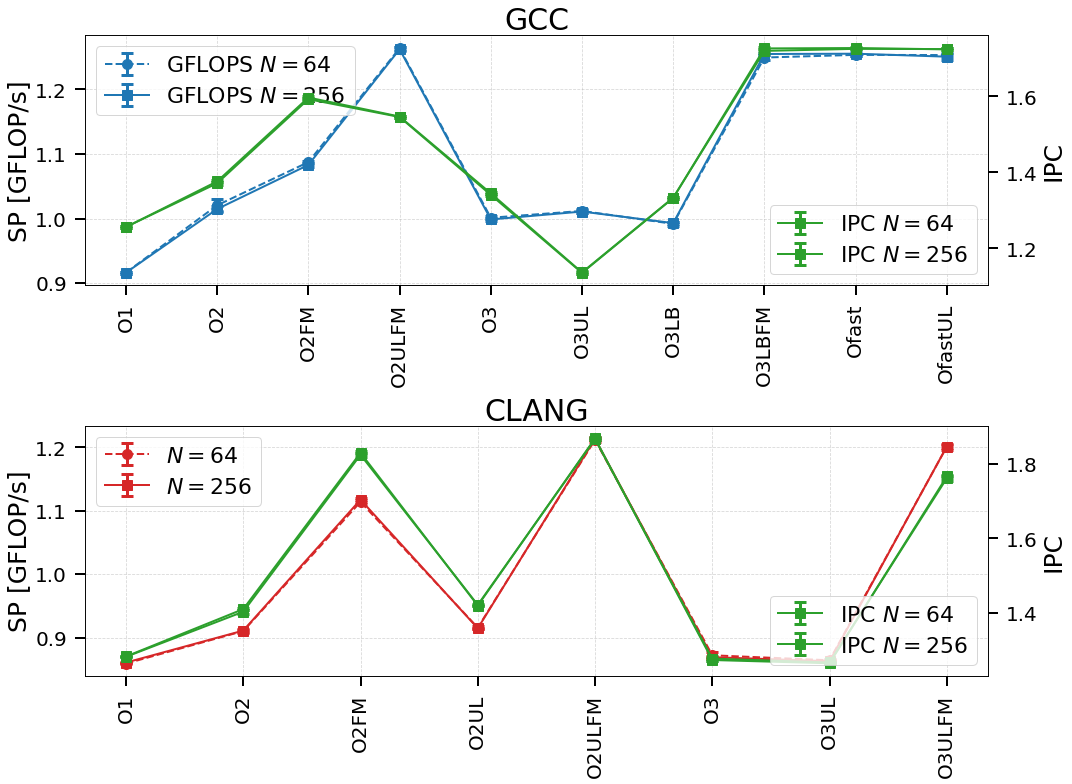

In [118]:
total_avg_gcc_64 = total_avg_gcc[:10, 0]
total_std_gcc_64 = total_avg_gcc[:10, 1]
total_avg_gcc_256 = total_avg_gcc[10:, 0]
total_std_gcc_256 = total_avg_gcc[10:, 1]
total_avg_clang_64 = total_avg_clang[:8, 0]
total_std_clang_64 = total_avg_clang[:8, 1]
total_avg_clang_256 = total_avg_clang[8:, 0]
total_std_clang_256 = total_avg_clang[8:, 1]

total_IPC_avg_gcc_64 = total_IPC_avg_gcc[:10, 0]
total_IPC_std_gcc_64 = total_IPC_avg_gcc[:10, 1]
total_IPC_avg_gcc_256 = total_IPC_avg_gcc[10:, 0]
total_IPC_std_gcc_256 = total_IPC_avg_gcc[10:, 1]
total_IPC_avg_clang_64 = total_IPC_avg_clang[:8, 0]
total_IPC_std_clang_64 = total_IPC_avg_clang[:8, 1]
total_IPC_avg_clang_256 = total_IPC_avg_clang[8:, 0]
total_IPC_std_clang_256 = total_IPC_avg_clang[8:, 1]

ms = 10
elw = 3
cs = 6
ct = 3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 11))

x_array_gcc = np.arange(1, np.size(total_avg_gcc[:10, 0]) + 1)

ax1.set_title('GCC', fontsize=30)
ax1.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax1.set_xticks(ticks=x_array_gcc)
ax1.tick_params(axis='both', labelsize=20)
ax1.tick_params(axis='both', which='major', length=10, width=2, pad=8)

ax1b = ax1.twinx()
ax1b.set_ylabel('IPC', fontsize=25)
ax1b.tick_params(axis='both', labelsize=20)
ax1b.tick_params(axis='both', which='major', length=10, width=2, pad=8)

labels = []
for flag in flags_gcc:
    labels.append(flag[2:-4])
ax1.set_xticklabels(labels, rotation=90)

ax1.errorbar(x_array_gcc, total_avg_gcc_64 * 1e-3, total_std_gcc_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'GFLOPS $N=64$', color='tab:blue')
ax1.errorbar(x_array_gcc, total_avg_gcc_256 * 1e-3, total_std_gcc_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'GFLOPS $N=256$', color='tab:blue')
ax1b.errorbar(x_array_gcc, total_IPC_avg_gcc_64, total_IPC_std_gcc_64, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'IPC $N=64$', color='tab:green')
ax1b.errorbar(x_array_gcc, total_IPC_avg_gcc_256, total_IPC_std_gcc_256, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'IPC $N=256$', color='tab:green')

ax1.grid(ls='--', alpha=0.5)
ax1.legend(fontsize=22, loc='upper left')
ax1b.legend(fontsize=22, loc='lower right')

x_array_clang = np.arange(1, np.size(total_avg_clang[:8, 0]) + 1)
ax2.set_title('CLANG', fontsize=30)
ax2.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax2.set_xticks(ticks=x_array_clang)
ax2.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='both', which='major', length=10, width=2, pad=8)

ax2b = ax2.twinx()
ax2b.set_ylabel('IPC', fontsize=25)
ax2b.tick_params(axis='both', labelsize=20)
ax2b.tick_params(axis='both', which='major', length=10, width=2, pad=8)

labels = []
for flag in flags_clang:
    labels.append(flag[2:-6])
ax2.set_xticklabels(labels, rotation=90)

ax2.errorbar(x_array_clang, total_avg_clang_64 * 1e-3, total_std_clang_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'$N=64$', color='tab:red')
ax2.errorbar(x_array_clang, total_avg_clang_256 * 1e-3, total_std_clang_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'$N=256$', color='tab:red')
ax2b.errorbar(x_array_clang, total_IPC_avg_clang_64, total_IPC_std_clang_64, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'IPC $N=64$', color='tab:green')
ax2b.errorbar(x_array_clang, total_IPC_avg_clang_256, total_IPC_std_clang_256, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'IPC $N=256$', color='tab:green')

ax2.grid(ls='--', alpha=0.5)
ax2.legend(fontsize=22)
ax2b.legend(fontsize=22, loc='lower right')


plt.tight_layout()
fig.savefig("GCCvsCLANG_GFLOPS.pdf")
fig.savefig("GCCvsCLANG_GFLOPS.jpg")

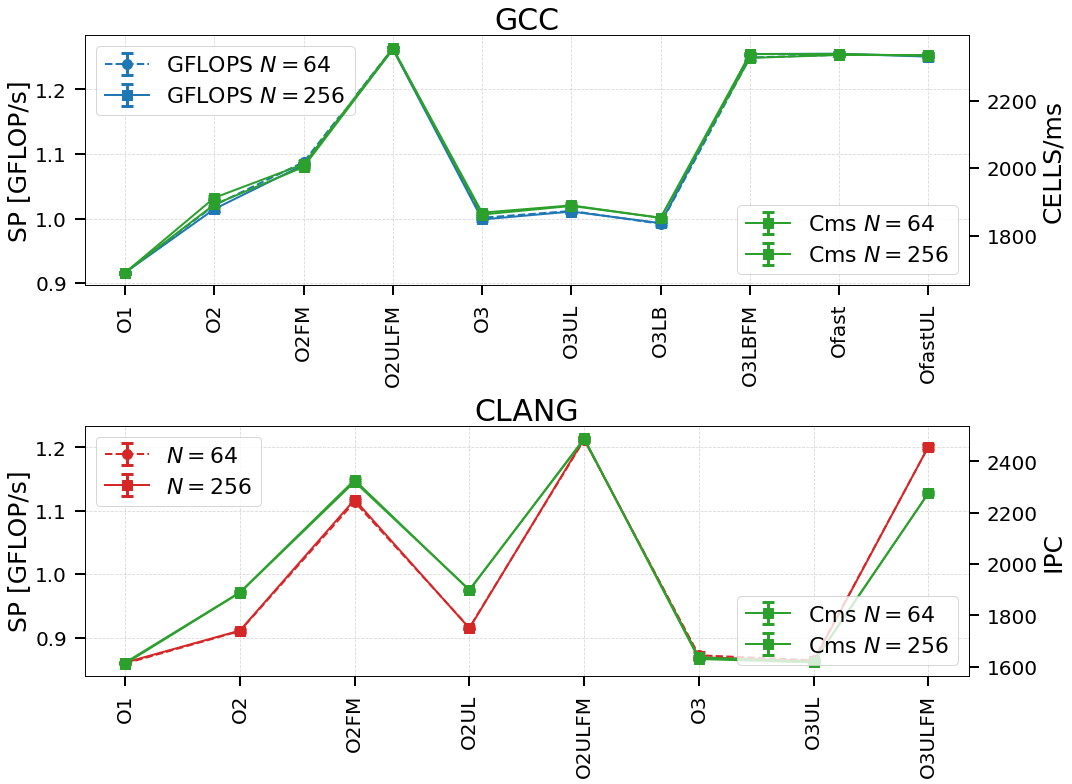

In [124]:
total_avg_gcc_64 = total_avg_gcc[:10, 0]
total_std_gcc_64 = total_avg_gcc[:10, 1]
total_avg_gcc_256 = total_avg_gcc[10:, 0]
total_std_gcc_256 = total_avg_gcc[10:, 1]
total_avg_clang_64 = total_avg_clang[:8, 0]
total_std_clang_64 = total_avg_clang[:8, 1]
total_avg_clang_256 = total_avg_clang[8:, 0]
total_std_clang_256 = total_avg_clang[8:, 1]

cells_ms_avg_gcc_64 = cells_ms_avg_gcc[:10, 0]
cells_ms_std_gcc_64 = cells_ms_avg_gcc[:10, 1]
cells_ms_avg_gcc_256 = cells_ms_avg_gcc[10:, 0]
cells_ms_std_gcc_256 = cells_ms_avg_gcc[10:, 1]
cells_ms_avg_clang_64 = cells_ms_avg_clang[:8, 0]
cells_ms_std_clang_64 = cells_ms_avg_clang[:8, 1]
cells_ms_avg_clang_256 = cells_ms_avg_clang[8:, 0]
cells_ms_std_clang_256 = cells_ms_avg_clang[8:, 1]

ms = 10
elw = 3
cs = 6
ct = 3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 11))

x_array_gcc = np.arange(1, np.size(total_avg_gcc[:10, 0]) + 1)

ax1.set_title('GCC', fontsize=30)
ax1.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax1.set_xticks(ticks=x_array_gcc)
ax1.tick_params(axis='both', labelsize=20)
ax1.tick_params(axis='both', which='major', length=10, width=2, pad=8)

ax1b = ax1.twinx()
ax1b.set_ylabel('CELLS/ms', fontsize=25)
ax1b.tick_params(axis='both', labelsize=20)
ax1b.tick_params(axis='both', which='major', length=10, width=2, pad=8)

labels = []
for flag in flags_gcc:
    labels.append(flag[2:-4])
ax1.set_xticklabels(labels, rotation=90)

ax1.errorbar(x_array_gcc, total_avg_gcc_64 * 1e-3, total_std_gcc_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'GFLOPS $N=64$', color='tab:blue')
ax1.errorbar(x_array_gcc, total_avg_gcc_256 * 1e-3, total_std_gcc_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'GFLOPS $N=256$', color='tab:blue')
ax1b.errorbar(x_array_gcc, cells_ms_avg_gcc_64, cells_ms_std_gcc_64, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'Cms $N=64$', color='tab:green')
ax1b.errorbar(x_array_gcc, cells_ms_avg_gcc_256, cells_ms_std_gcc_256, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'Cms $N=256$', color='tab:green')

ax1.grid(ls='--', alpha=0.5)
ax1.legend(fontsize=22, loc='upper left')
ax1b.legend(fontsize=22, loc='lower right')

x_array_clang = np.arange(1, np.size(total_avg_clang[:8, 0]) + 1)
ax2.set_title('CLANG', fontsize=30)
ax2.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax2.set_xticks(ticks=x_array_clang)
ax2.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='both', which='major', length=10, width=2, pad=8)

ax2b = ax2.twinx()
ax2b.set_ylabel('IPC', fontsize=25)
ax2b.tick_params(axis='both', labelsize=20)
ax2b.tick_params(axis='both', which='major', length=10, width=2, pad=8)

labels = []
for flag in flags_clang:
    labels.append(flag[2:-6])
ax2.set_xticklabels(labels, rotation=90)

ax2.errorbar(x_array_clang, total_avg_clang_64 * 1e-3, total_std_clang_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'$N=64$', color='tab:red')
ax2.errorbar(x_array_clang, total_avg_clang_256 * 1e-3, total_std_clang_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'$N=256$', color='tab:red')
ax2b.errorbar(x_array_clang, cells_ms_avg_clang_64, cells_ms_std_clang_64, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'Cms $N=64$', color='tab:green')
ax2b.errorbar(x_array_clang, cells_ms_avg_clang_256, cells_ms_std_clang_256, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'Cms $N=256$', color='tab:green')

ax2.grid(ls='--', alpha=0.5)
ax2.legend(fontsize=22)
ax2b.legend(fontsize=22, loc='lower right')


plt.tight_layout()
fig.savefig("GFLOPSandCELLS_ms.pdf")
fig.savefig("GFLOPSandCELLS_ms.jpg")

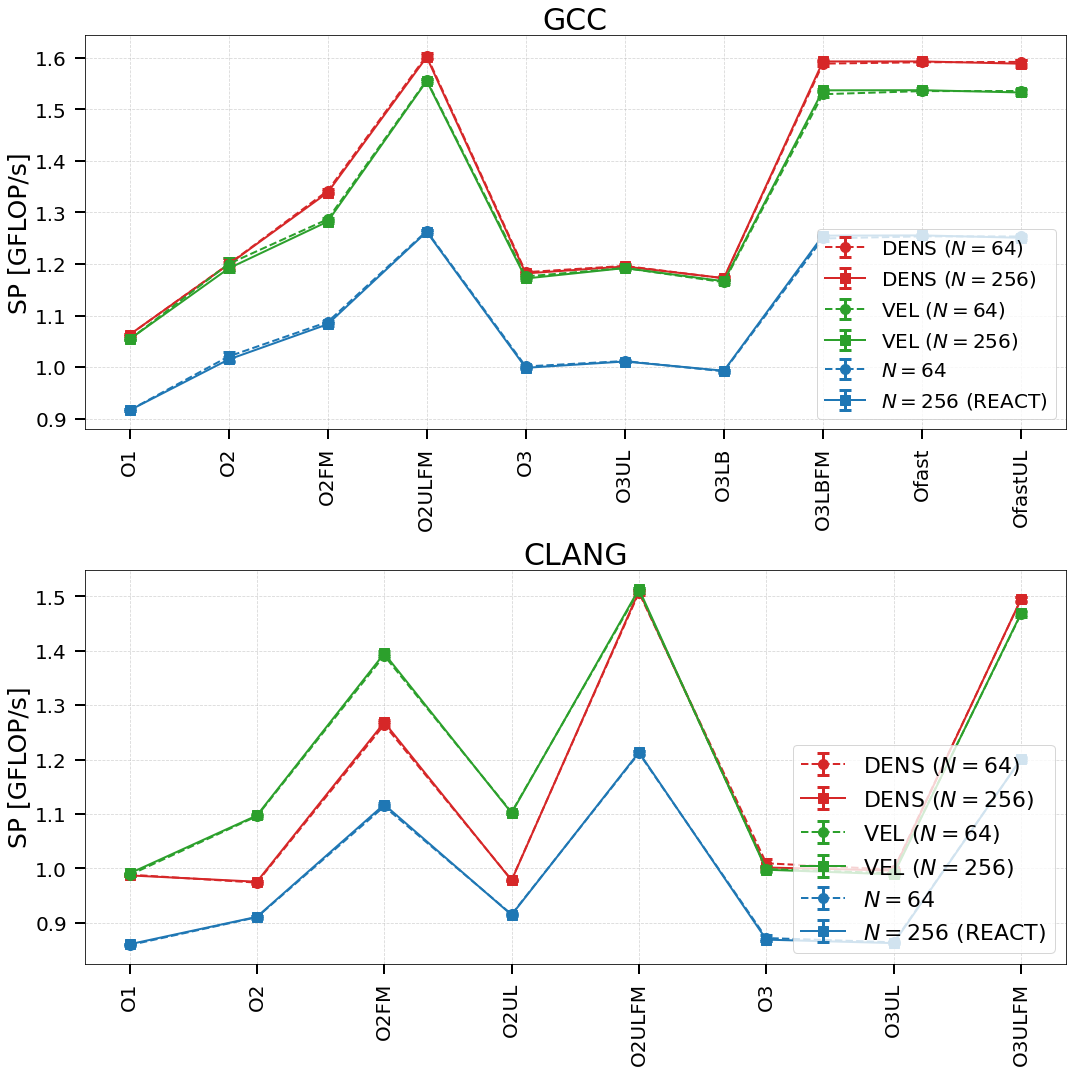

In [98]:
dens_avg_gcc_64 = dens_avg_gcc[:10, 0]
dens_std_gcc_64 = dens_avg_gcc[:10, 1]
dens_avg_gcc_256 = dens_avg_gcc[10:, 0]
dens_std_gcc_256 = dens_avg_gcc[10:, 1]
dens_avg_clang_64 = dens_avg_clang[:8, 0]
dens_std_clang_64 = dens_avg_clang[:8, 1]
dens_avg_clang_256 = dens_avg_clang[8:, 0]
dens_std_clang_256 = dens_avg_clang[8:, 1]
vel_avg_gcc_64 = vel_avg_gcc[:10, 0]
vel_std_gcc_64 = vel_avg_gcc[:10, 1]
vel_avg_gcc_256 = vel_avg_gcc[10:, 0]
vel_std_gcc_256 = vel_avg_gcc[10:, 1]
vel_avg_clang_64 = vel_avg_clang[:8, 0]
vel_std_clang_64 = vel_avg_clang[:8, 1]
vel_avg_clang_256 = vel_avg_clang[8:, 0]
vel_std_clang_256 = vel_avg_clang[8:, 1]
react_avg_gcc_64 = react_avg_gcc[:10, 0]
react_std_gcc_64 = react_avg_gcc[:10, 1]
react_avg_gcc_256 = react_avg_gcc[10:, 0]
react_std_gcc_256 = react_avg_gcc[10:, 1]
react_avg_clang_64 = react_avg_clang[:8, 0]
react_std_clang_64 = react_avg_clang[:8, 1]
react_avg_clang_256 = react_avg_clang[8:, 0]
react_std_clang_256 = react_avg_clang[8:, 1]

ms = 10
elw = 3
cs = 6
ct = 3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

x_array_gcc = np.arange(1, np.size(vel_avg_gcc[:10, 0]) + 1)

ax1.set_title('GCC', fontsize=30)
ax1.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax1.set_xticks(ticks=x_array_gcc)
ax1.tick_params(axis='both', labelsize=20)
ax1.tick_params(axis='both', which='major', length=10, width=2, pad=8)

labels = []
for flag in flags_gcc:
    labels.append(flag[2:-4])
ax1.set_xticklabels(labels, rotation=90)

ax1.errorbar(x_array_gcc, dens_avg_gcc_64 * 1e-3, dens_std_gcc_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'DENS ($N=64$)', color='tab:red')
ax1.errorbar(x_array_gcc, dens_avg_gcc_256 * 1e-3, dens_std_gcc_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'DENS ($N=256$)', color='tab:red')
ax1.errorbar(x_array_gcc, vel_avg_gcc_64 * 1e-3, vel_std_gcc_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'VEL ($N=64$)', color='tab:green')
ax1.errorbar(x_array_gcc, vel_avg_gcc_256 * 1e-3, vel_std_gcc_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'VEL ($N=256$)', color='tab:green')
ax1.errorbar(x_array_gcc, total_avg_gcc_64 * 1e-3, total_std_gcc_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'$N=64$', color='tab:blue')
ax1.errorbar(x_array_gcc, total_avg_gcc_256 * 1e-3, total_std_gcc_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'$N=256$ (REACT)', color='tab:blue')

ax1.grid(ls='--', alpha=0.5)
ax1.legend(fontsize=20, loc='lower right')

x_array_clang = np.arange(1, np.size(vel_avg_clang[:8, 0]) + 1)
ax2.set_title('CLANG', fontsize=30)
ax2.set_ylabel('SP [GFLOP/s]', fontsize=25)
ax2.set_xticks(ticks=x_array_clang)
ax2.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='both', which='major', length=10, width=2, pad=8)

labels = []
for flag in flags_clang:
    labels.append(flag[2:-6])
ax2.set_xticklabels(labels, rotation=90)

ax2.errorbar(x_array_clang, dens_avg_clang_64 * 1e-3, dens_std_clang_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'DENS ($N=64$)', color='tab:red')
ax2.errorbar(x_array_clang, dens_avg_clang_256 * 1e-3, dens_std_clang_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'DENS ($N=256$)', color='tab:red')
ax2.errorbar(x_array_clang, vel_avg_clang_64 * 1e-3, vel_std_clang_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'VEL ($N=64$)', color='tab:green')
ax2.errorbar(x_array_clang, vel_avg_clang_256 * 1e-3, vel_std_clang_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'VEL ($N=256$)', color='tab:green')
ax2.errorbar(x_array_clang, total_avg_clang_64 * 1e-3, total_std_clang_64 * 1e-3, lw=2, marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, ls='--', label=r'$N=64$', color='tab:blue')
ax2.errorbar(x_array_clang, total_avg_clang_256 * 1e-3, total_std_clang_256 * 1e-3, lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label=r'$N=256$ (REACT)', color='tab:blue')

ax2.grid(ls='--', alpha=0.5)
ax2.legend(fontsize=22, loc='lower right')


plt.tight_layout()
fig.savefig("GCCvsCLANG_GFLOPS_disc.pdf")
fig.savefig("GCCvsCLANG_GFLOPS_disc.jpg")

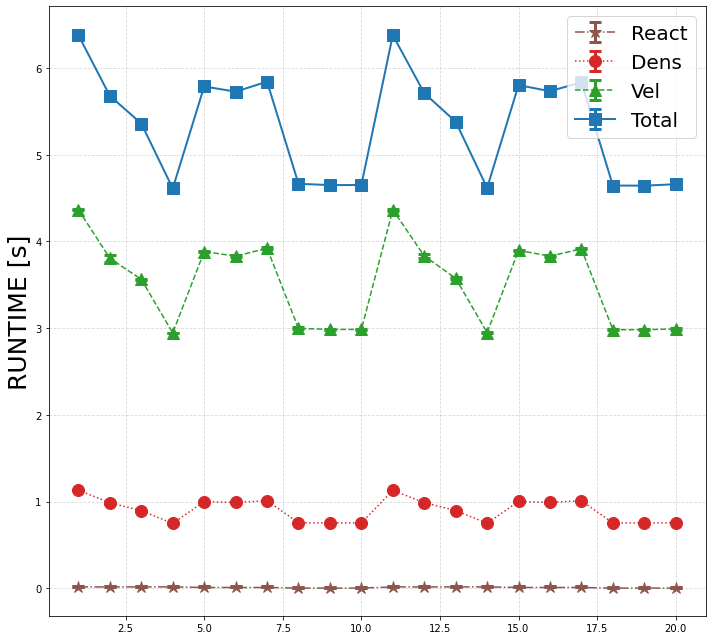

In [105]:
ms = 12
elw = 3
cs = 6
ct = 3

fig, ax1 = plt.subplots(figsize=(10, 9))
x_array_gcc = np.arange(1, np.size(total_avg_gcc[:10, 0]) + 1,1)

ax1.set_ylabel('RUNTIME [s]', fontsize=25)
ax2.set_xticks(ticks=x_array_gcc)
ax2.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='both', which='major', length=10, width=2, pad=8)

labels = []
for flag in flags_gcc:
    labels.append(flag[2:-6])
ax2.set_xticklabels(labels, rotation=90)

ax1.errorbar(x_array, react_time_avg_gcc[:, 0], react_time_avg_gcc[:, 1], marker='*', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='React', color='tab:brown', ls='-.')
ax1.errorbar(x_array, dens_time_avg_gcc[:, 0], dens_time_avg_gcc[:, 1], marker='o', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Dens', color='tab:red', ls=':')
ax1.errorbar(x_array, vel_time_avg_gcc[:, 0], vel_time_avg_gcc[:, 1], marker='^', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Vel', color='tab:green', ls='--')
ax1.errorbar(x_array, total_time_avg_gcc[:, 0], total_time_avg_gcc[:, 1], lw=2, marker='s', markersize=ms, elinewidth=elw,
            capsize=cs, capthick=ct, label='Total', color='tab:blue')

ax1.grid(ls='--', alpha=0.5)
ax1.legend(fontsize=20, loc='best')

plt.tight_layout()
fig.savefig("runtime.pdf")
fig.savefig("runtime.jpg")